**Демо-экзамен по курсу "Машинное обучение"**

Выполнил: Каменец Ольга Алексеевна Б22-712

Филиал: НИЯУ МИФИ

 *Вставьте ниже скриншот из личного кабинета Иннополиса с результатами прохождения итогового асессмента (https://auth.unionepro.ru/login?redirect=https%3A%2F%2Fassessment.unionepro.ru%2F)*

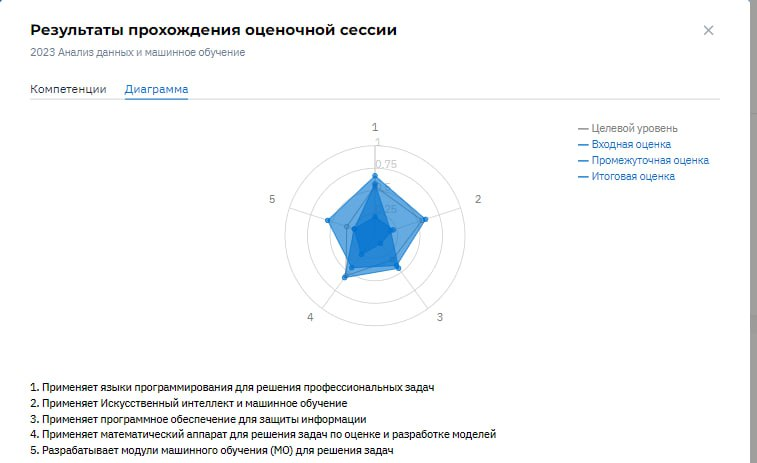![image.png]()

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


*Загрузить данные в соответствии с вариантом задания*

In [2]:
# Load data

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Data information output
print(data.DESCR)

df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 1.2 Описание исходных данных


*Привести описание исходных данных, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных. Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные.*

Данные связаны с диагностикой рака молочной железы, в частности, с задачей классификации опухолей как злокачественных (Malignant) или доброкачественных (Benign).

**Основные характеристики данных:**
*   Число наблюдений (экземпляров): 569. Каждая строка представляет собой
информацию об одном образце ткани, полученном из опухоли.
*   Число признаков (атрибутов): 30 числовых признаков, каждый из которых описывает различные аспекты опухоли, такие как форма, размеры и текстура. Признаки были получены на основе анализа изображений тканей.

**Признаки:**

Признаки основаны на характеристиках ядер клеток, обнаруженных в изображениях опухоли. Они делятся на три группы:


1.   Mean (средние значения): характеристики, усреднённые по всем клеткам в образце.
2.   Standard Error (стандартная ошибка): статистическая оценка точности среднего.
1.   Worst (худшие значения): наибольшие значения по всем клеткам для каждого из признаков.

**Примеры характеристик:**


*   Radius: среднее расстояние от центра до периметра.
*   Texture: стандартное отклонение значений серого цвета в изображении.
*   Perimeter: периметр опухоли.
*   Area: площадь опухоли.
*   Smoothness: вариация длины радиуса.
*   Compactness: мера компактности (периметр^2 / площадь).
*   Concavity: степень выраженности вогнутых частей контура.
*   Concave points: количество вогнутых участков контура.
*   Symmetry: симметрия формы опухоли.
*   Fractal dimension: фрактальная размерность, оценивающая "неровность" контура.


**Класс:**
*   WDBC-Malignant: Злокачественная опухоль.
*   WDBC-Benign: Доброкачественная опухоль.


Данные используются для задачи кластеризации, где входные параметры - характеристики опухоли, а выходные - класс (WDBC-Malignant/WDBC-Benign)






















### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [4]:
# Calculation of the main statistical characteristics
statistics = df.describe().T

# Adding mids and dispersions to the table
statistics['median'] = df.median()
statistics['variance'] = df.var()

print(statistics)

                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error          

### 1.4 Исследование распределений признаков и откликов


*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

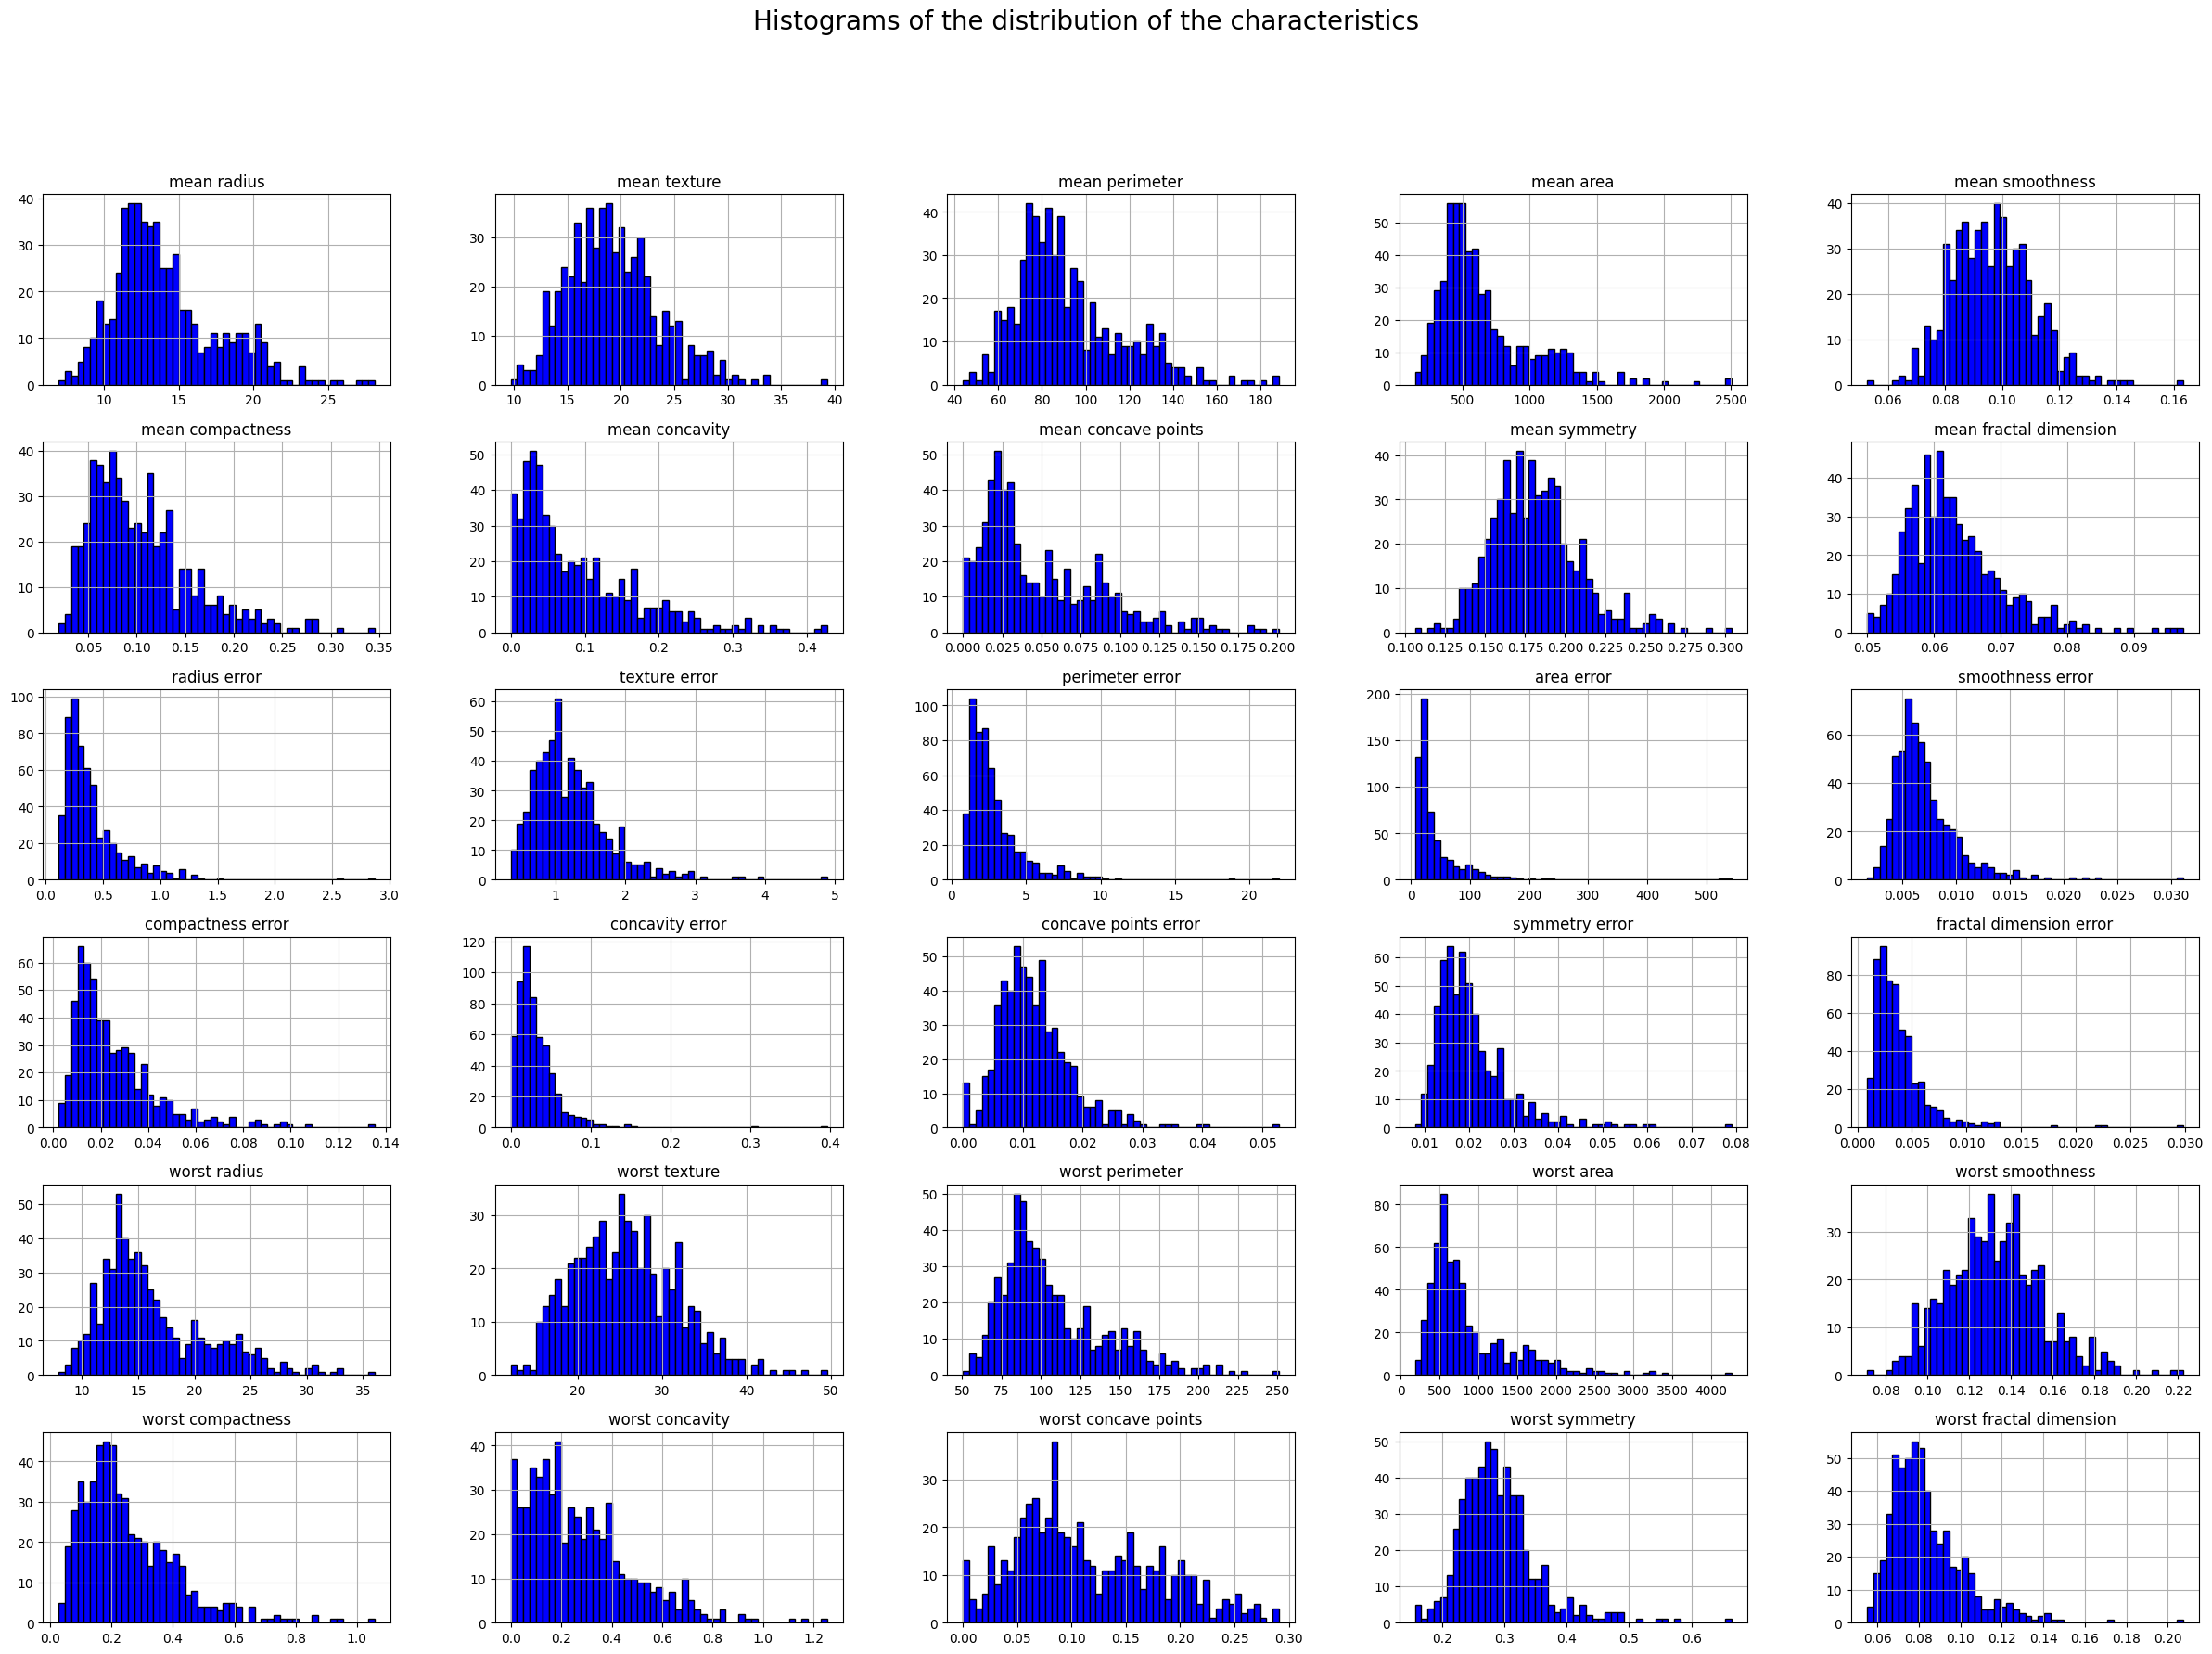

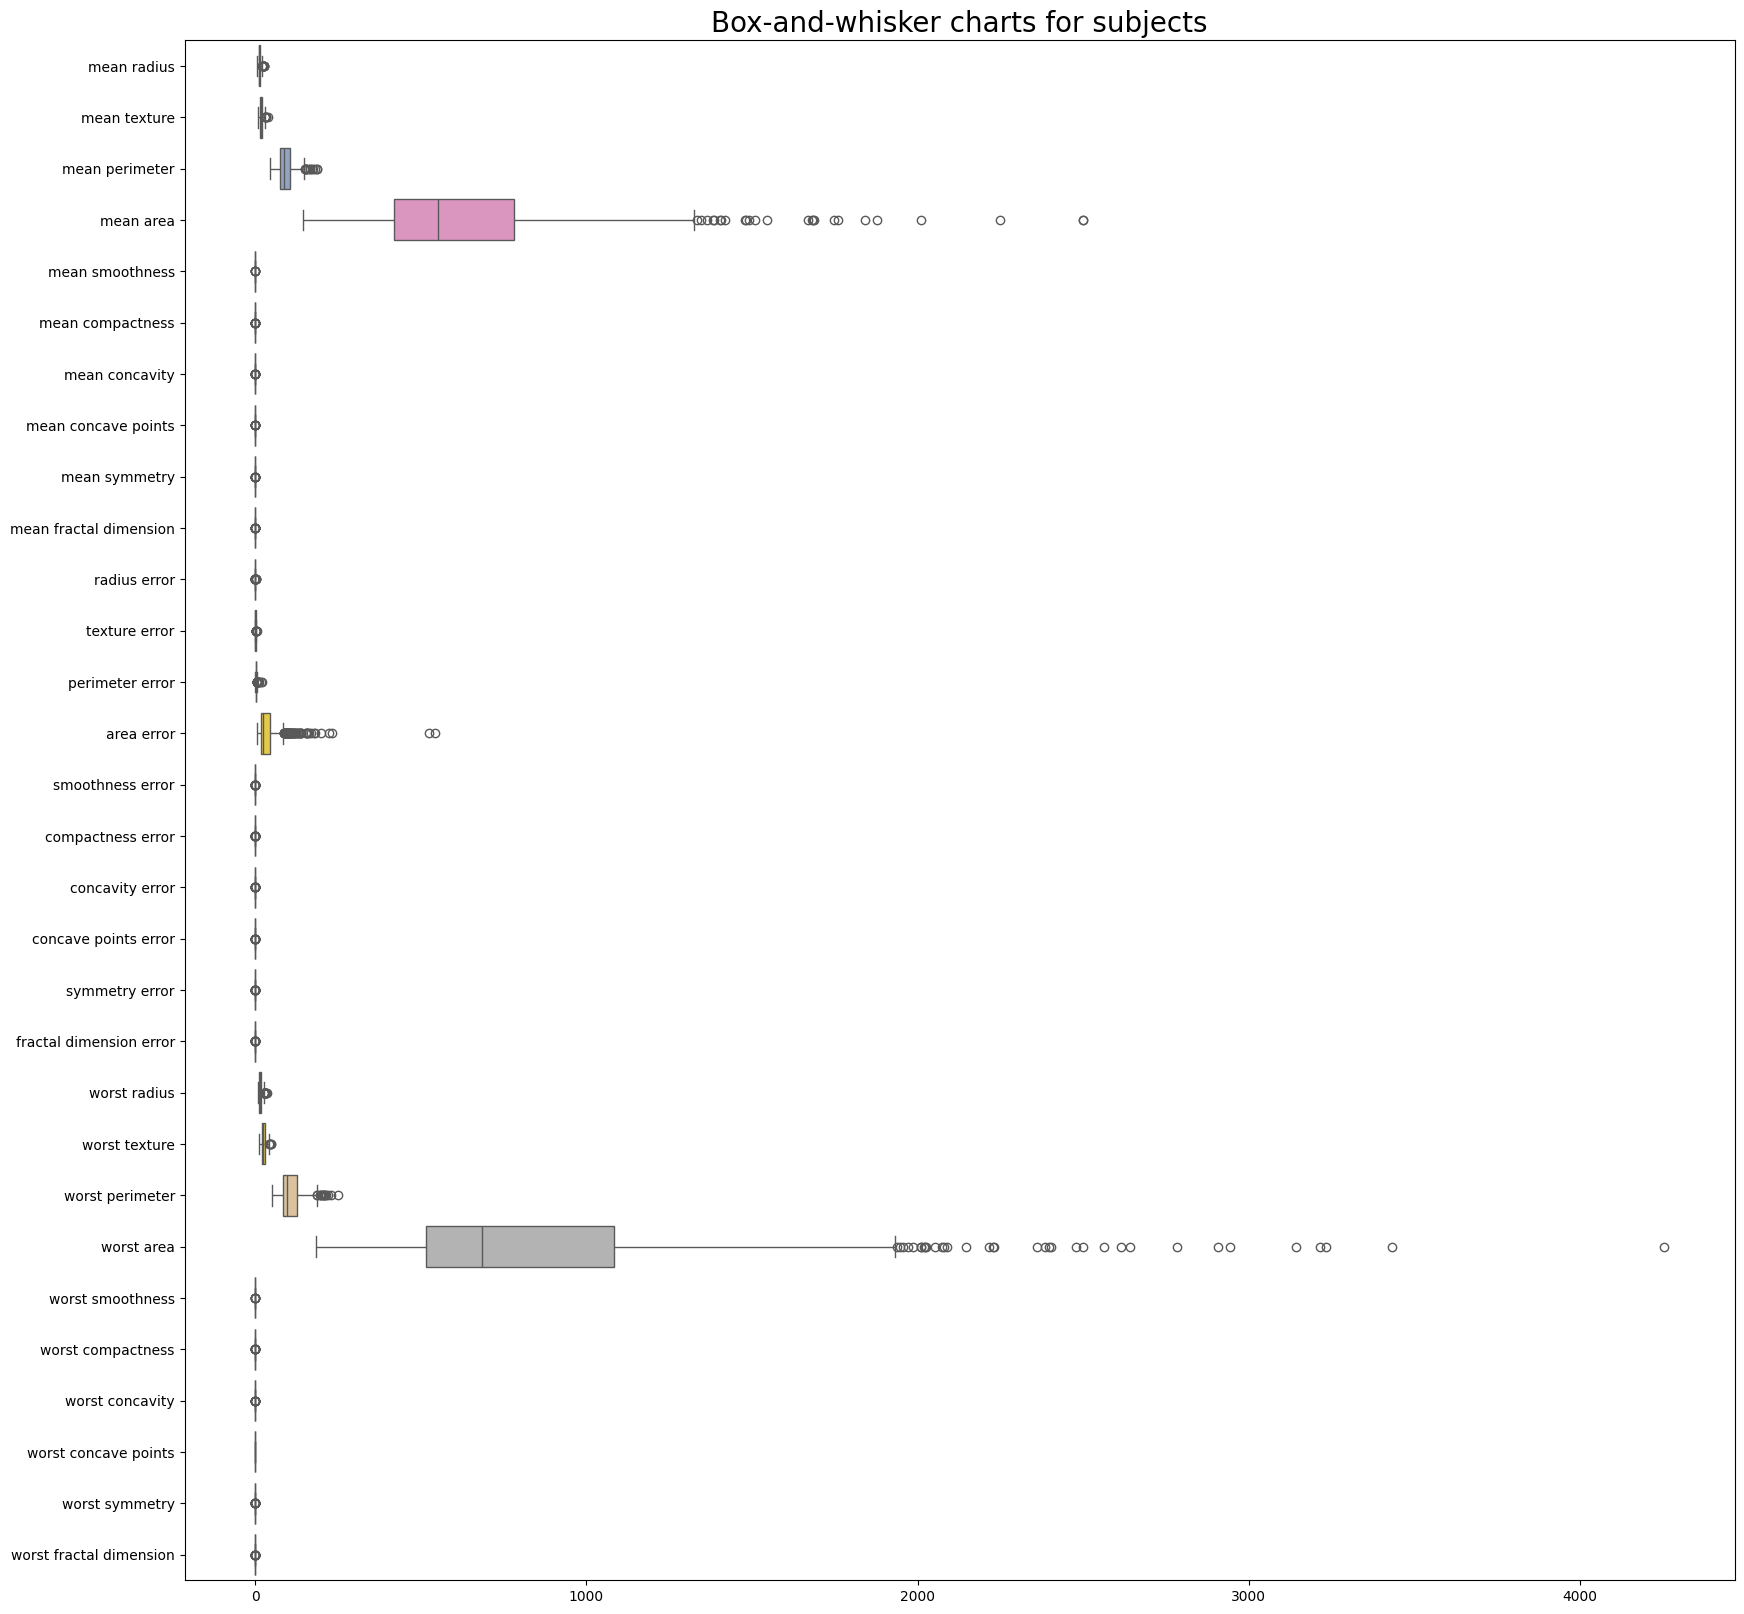

In [5]:
# Histograms
df.hist(figsize=(30, 20), bins=50, color='blue', edgecolor='black')
plt.suptitle('Histograms of the distribution of the characteristics', fontsize=20)
plt.show()

# Box-and-Whisker
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box-and-whisker charts for subjects', fontsize=20)
plt.show()

Большое количество выбросов в признаках "mean area" и "worst area"

### 1.5 Корреляционный анализ данных


*Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы*

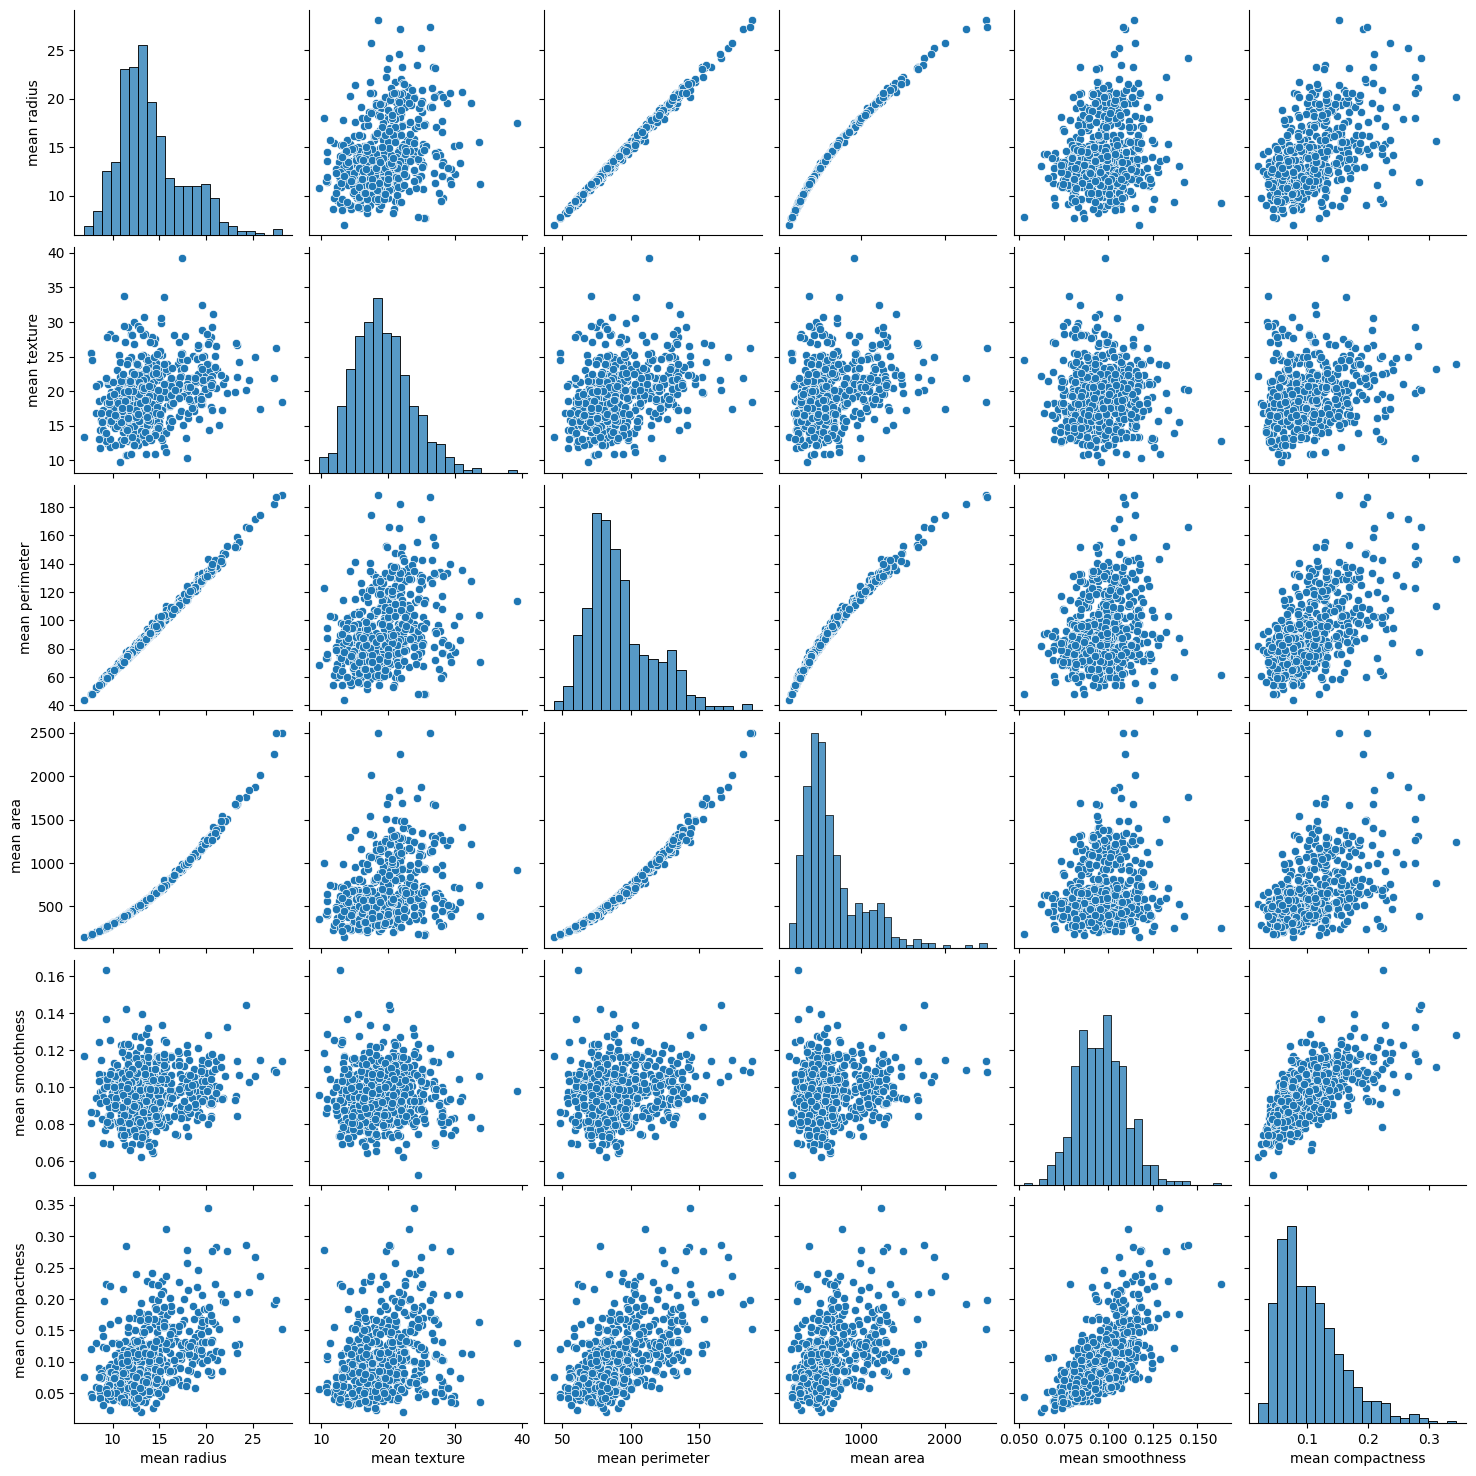

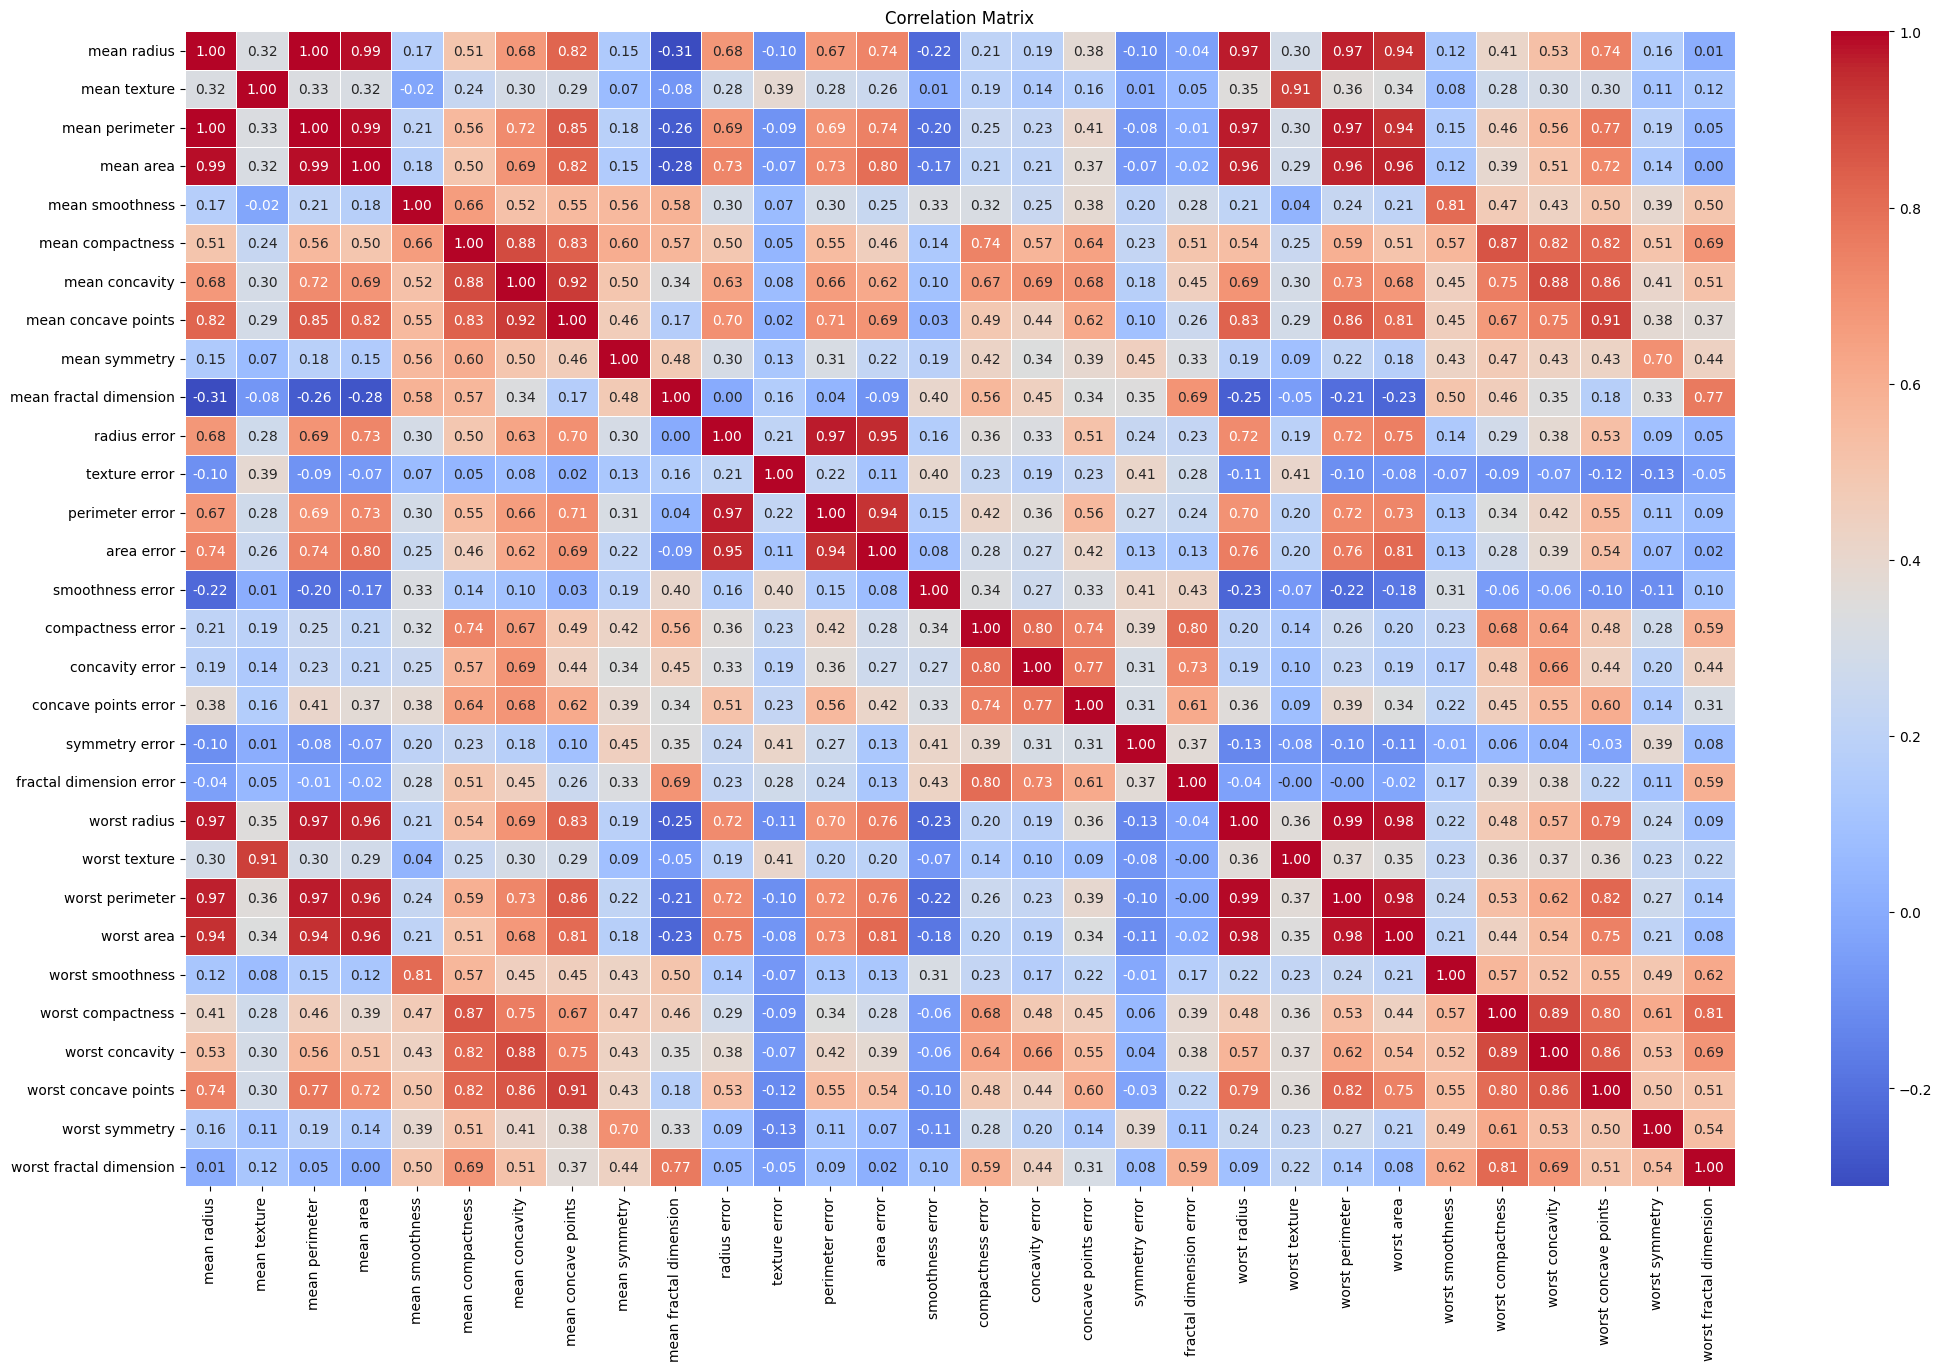

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Scatter Diagram
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness','mean compactness']])
plt.show()

#Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Выводы по гистограммам:**

mean perimetr, mean area и mean radius линейно зависимы друг от друга

Остальные признаки расположены без видимого тренда

Однако между некоторыми парами признаками знаметна класстеризация. Например: radius - smoothness, perimert - texture


**Выводы по матрице корреляции:**

Есть сильно положительна корреляция (коэф 1.00, mean radius - mean perimetr), положительная корреляция (коэф >0.80, mean perimetr -mean concave points), сильно отрицательной корреляции обнаружено не было, но существует умеренно отрицательная корреляция(worst radius - mean fractal dimersion).





### 1.6 Выводы


*Сделать выводы по результатам предварительного визуального анализа исходных данных*



1.   **Анализ выборочных характеристик:**
Данные показывают значительную вариативность, что подтверждается значениями стандартного отклонения и дисперсии большинства признаков. Средние значения и медианы указывают на наличие асимметрии в распределениях многих признаков, особенно тех, которые связаны с размерами опухолей.
1.   **Анализ распределений признаков:** Гистограммы показали, что ряд признаков имеет распределения, близкие к нормальному, однако встречаются и сильно асимметричные признаки. Box-диаграммы выявили выбросы в таких признаках, как "mean area" и "mean perimeter", что подчеркивает необходимость дополнительной обработки данных для повышения точности модели.
2.   **Корреляционный анализ:** Между признаками, связанными с размерами опухолей (например, радиусом, периметром и площадью), наблюдается высокая корреляция, что может указывать на избыточность данных и необходимость применения методов отбора или объединения признаков. Признаки, такие как "mean texture" и "mean smoothness", слабо коррелируют с остальными, что делает их уникально информативными для модели.

---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [7]:
#Duplicate Detection and Search
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
print(f"Number of duplicates: {len(duplicates)}")

#Detection and elimination of emissions
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of rows after the emission is removed: {df_cleaned.shape[0]}")

#Removing and restoring missing values
missing_values = df.isnull().sum()
print(f"Number of values missed:\n{missing_values}")
df = df.dropna()
df = df.fillna(df.mean())

Number of duplicates: 0
Number of rows after the emission is removed: 398
Number of values missed:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


### 2.2 Разбиение данных на обучающую и тестовую выборки


*Разбить данные на обучающую и тестовую выборки в отношении 70/30*

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Sample size: {X_train.shape[0]} strings")
print(f"Test sample size: {X_test.shape[0]} strings")

Sample size: 398 strings
Test sample size: 171 strings


### 2.3 Преобразование данных

*Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам*



1.   **Масштабирование признаков:** Для приведения данных к стандартному виду с нулевым средним и единичным стандартным отклонением был использован StandardScaler. Масштабирование применили ко всем признакам, что особенно важно для улучшения качества обучения моделей, таких как логистическая регрессия, метод опорных векторов и нейронные сети. Преобразования были обучены на обучающем наборе данных и затем применены к тестовому, чтобы предотвратить утечку данных.
2.   **Отсутствие категориальных переменных:** В данном наборе данных категориальные переменные отсутствуют, поэтому кодирование не потребовалось.



In [9]:
from sklearn.preprocessing import StandardScaler

# initialization StandardScaler
scaler = StandardScaler()

# Conversion of the learning sample
X_train_scaled = scaler.fit_transform(X_train)

# Test sample conversion
X_test_scaled = scaler.transform(X_test)

# Output first 5 lines after scaling for checking
print("First 5 lines of the sample after scaling:")
print(X_train_scaled[:5])

First 5 lines of the sample after scaling:
[[-0.12348985 -0.29680142 -0.17050713 -0.20861569 -1.2016799  -0.7731696
  -0.76231194 -0.93324109 -1.22994935 -0.94816603 -0.53359339 -0.86028757
  -0.61678096 -0.39177533 -1.35556152 -0.52503193 -0.4817033  -0.97940018
  -0.88459317 -0.68548672 -0.19761978 -0.5067476  -0.30791001 -0.27357592
  -1.50742388 -0.44926047 -0.57223884 -0.84082156 -0.8563616  -0.76574773]
 [-0.22826757 -0.65795149 -0.25377521 -0.2965028  -1.80463697 -0.58761605
  -0.09198533 -0.54268359 -1.41998468 -0.61249143 -0.83040055 -0.12266723
  -0.78254381 -0.53126109 -0.36490698  0.40861926  0.57668457 -0.2482875
  -1.03572382  0.10768859 -0.42291745 -0.45849468 -0.4652873  -0.43812681
  -1.27301714  0.02704209  0.31804488 -0.37706655 -1.3415819  -0.41480748]
 [ 0.14553402 -1.23056444  0.24583328 -0.01024193  0.5191843   1.57000613
   0.73231958  0.38658307  1.05420084  1.57422827  0.48747836  0.59258929
   0.90918448  0.18132474  0.93956737  1.50696696  0.68362272  0.6222

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


*Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке*

Требования к модели и алгоритмам:

1)Задача классификации

2)Числовые данные

3)Большое количество данных

4)Важна точность полученных результатов

По результатам требований был выбран Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(random_state=45)

# Model learning on data learning
model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

### 3.2 Оценка качества модели


**Для задач регрессии:**
* *построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок*
* *построить линейные регрессии выхода модели на желаемый выход*
* *рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок*
* *построить гистограммы распределения ошибок модели.*

**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

Error matrix for learning sample:
[[149   0]
 [  0 249]]
Error matrix for test sample:
[[ 60   3]
 [  1 107]]


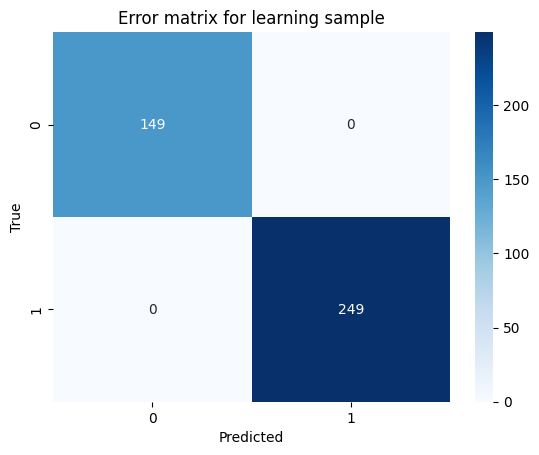

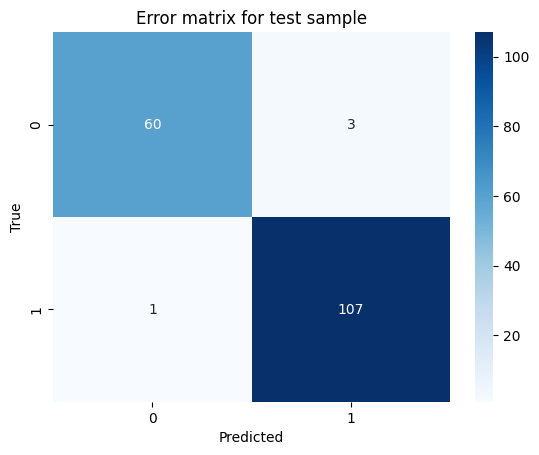

Recall on a learning sample: 1.00
Precision on a learning sample: 1.00
F-measure on a learning sample: 1.00
Specificity on a learning sample: 1.00
Kappa Cohen on a learning sample: 1.00
Recall on a test sample: 0.99
Precision on a test sample: 0.97
F-measure on a test sample: 0.98
Specificity on a test sample: 0.95
Kappa Cohen on a test sample: 0.95


In [11]:
# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Error matrix for learning sample
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Error matrix for learning sample:")
print(train_conf_matrix)

# Error matrix for test sample
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Error matrix for test sample:")
print(test_conf_matrix)

# Error matrix visualization
def plot_conf_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_conf_matrix(train_conf_matrix, 'Error matrix for learning sample')
plot_conf_matrix(test_conf_matrix, 'Error matrix for test sample')

#Learning sample

# Recall
train_recall = recall_score(y_train, y_train_pred)
print(f'Recall on a learning sample: {train_recall:.2f}')

# Precision
train_precision = precision_score(y_train, y_train_pred)
print(f'Precision on a learning sample: {train_precision:.2f}')

# F-measure
train_f1 = f1_score(y_train, y_train_pred)
print(f'F-measure on a learning sample: {train_f1:.2f}')

# Specificity
train_specificity = train_conf_matrix[0,0] / (train_conf_matrix[0,0] + train_conf_matrix[0,1])
print(f'Specificity on a learning sample: {train_specificity:.2f}')

# Kappa Cohen
train_kappa = cohen_kappa_score(y_train, y_train_pred)
print(f'Kappa Cohen on a learning sample: {train_kappa:.2f}')

#Test sample

# Recall
test_recall = recall_score(y_test, y_test_pred)
print(f'Recall on a test sample: {test_recall:.2f}')

# Precision
test_precision = precision_score(y_test, y_test_pred)
print(f'Precision on a test sample: {test_precision:.2f}')

# F-measure
test_f1 = f1_score(y_test, y_test_pred)
print(f'F-measure on a test sample: {test_f1:.2f}')

# Specificity
test_specificity = test_conf_matrix[0,0] / (test_conf_matrix[0,0] + test_conf_matrix[0,1])
print(f'Specificity on a test sample: {test_specificity:.2f}')

# Kappa Cohen
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print(f'Kappa Cohen on a test sample: {test_kappa:.2f}')

### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best settings:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on test sample with best parameters: 0.97


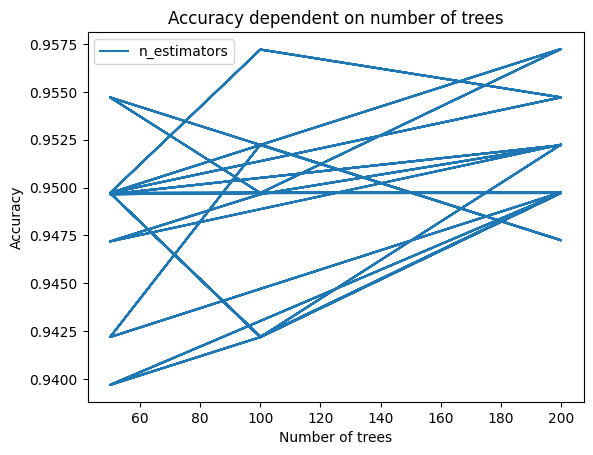

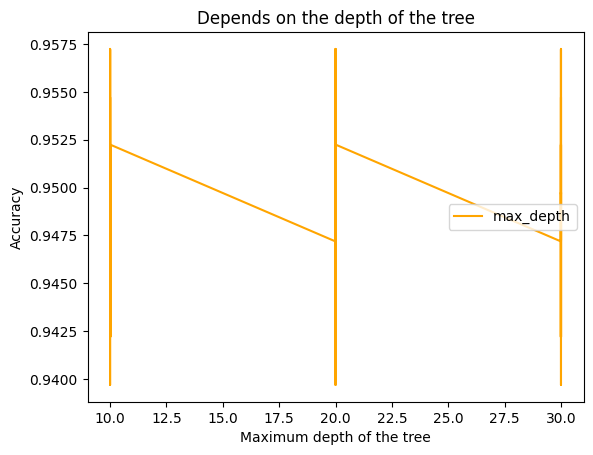

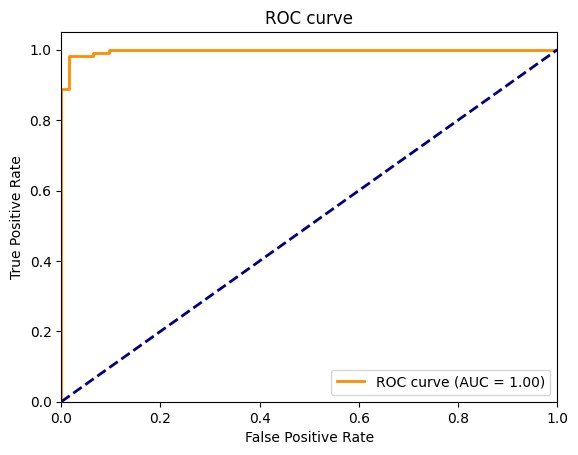

Importance of the attributes:
1. mean concave points (0.1385)
2. worst concave points (0.1277)
3. worst perimeter (0.1216)
4. worst area (0.1193)
5. worst radius (0.0702)
6. mean concavity (0.0644)
7. mean perimeter (0.0512)
8. mean area (0.0471)
9. worst concavity (0.0389)
10. mean radius (0.0329)
11. area error (0.0298)
12. worst texture (0.0186)
13. worst compactness (0.0164)
14. radius error (0.0137)
15. worst symmetry (0.0134)
16. mean compactness (0.0131)
17. mean texture (0.0130)
18. perimeter error (0.0091)
19. worst smoothness (0.0089)
20. mean fractal dimension (0.0065)
21. worst fractal dimension (0.0063)
22. mean smoothness (0.0057)
23. compactness error (0.0052)
24. smoothness error (0.0050)
25. concavity error (0.0050)
26. fractal dimension error (0.0046)
27. symmetry error (0.0037)
28. mean symmetry (0.0035)
29. texture error (0.0035)
30. concave points error (0.0033)


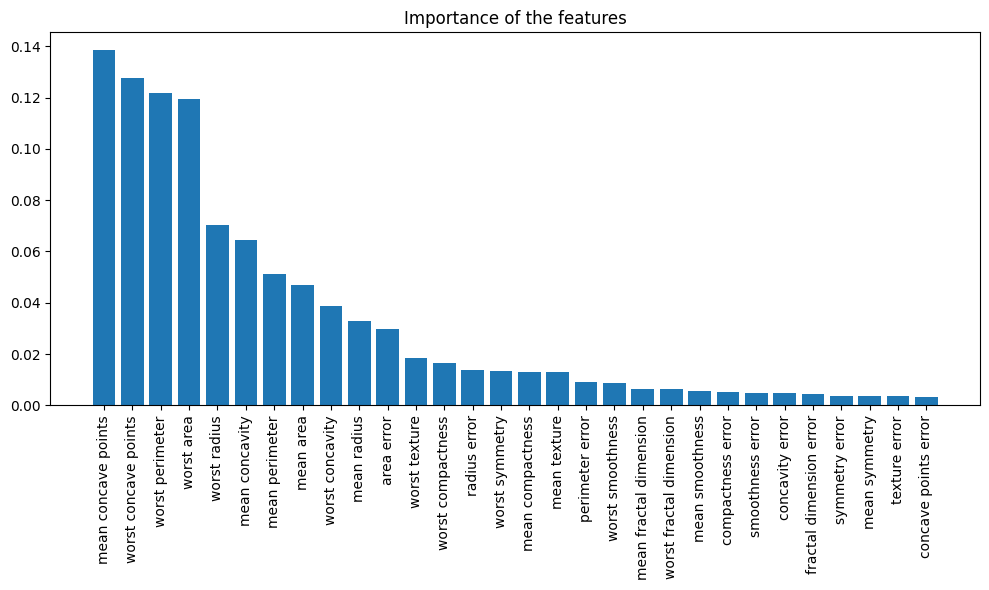

In [12]:
# Import
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Defining the range of hyperparameters to be investigated
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV Setting for Hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Cross-validation and model training
grid_search.fit(X_train, y_train)

# Best parameters output
print("Best settings: ", grid_search.best_params_)

# Model evaluation on test sample
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test sample with best parameters: {accuracy:.2f}')

results = pd.DataFrame(grid_search.cv_results_)

# Tree number dependency graph (n_estimators)
plt.plot(results['param_n_estimators'], results['mean_test_score'], label='n_estimators')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy dependent on number of trees')
plt.legend()
plt.show()

# Tree depth dependency graph (max_depth)
plt.plot(results['param_max_depth'], results['mean_test_score'], label='max_depth', color='orange')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.title('Depends on the depth of the tree')
plt.legend()
plt.show()

# Probabilities for test sample
y_prob = best_model.predict_proba(X_test)[:, 1]

# Building a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC curve chart
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Getting the importance of the features
importances = best_model.feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]

# Finding importance of the attributes
print("Importance of the attributes:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualization of the importance of the features
plt.figure(figsize=(10,6))
plt.title("Importance of the features")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

### 3.4 Улучшение решения


*Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2*

In [13]:
# Import
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Creating and training XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on test sample
y_test_pred_xgb = xgb_model.predict(X_test)

# Accuracy assessment on test sample
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f'Accuracy on test sample with XGBoost: {accuracy_xgb:.2f}')

Accuracy on test sample with XGBoost: 0.96


Точности Random Forest и XGBoost совпадают и составляют 0.96

### 3.5 Выводы


*Сделать выводы по результатам проведенных исследований*

**3.1 Выбор модели обучения**

После поставленных требований была выбранна модель Random Forest, как стабильный способ обучения с минимальной вероятностью переобучения.

**3.2 Оценка качества модели**

Модель показала отличный результат в виде 96%, что свидетельствует о ее высокой способности отличать доброкачественные опухоли от злокачественных

**3.4 Улучшение решения**

В качестве альтернативной модели была выбрана XGBoost, которая тоже показала отличный результат в 96%

**Итог**

Модель хорошо справляется в поставленной задачей классификации, однако не идеально. Требуется больше данных, чтобы довести модель до 100%


